<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MDS-UFU-DL-TEST/blob/main/MDS_UFU_DL_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MDS-UFU-DL-TEST. Построение классификатора**



Это учебное соревнование в рамках курса “Глубокое обучение в науках о данных”. В нем вам предстоит построить модель, классифицирующую изображения с одеждой, построенную на датасете Fashion-MNIST. Подробнее о датасете можно узнать во вкладке Data. Задача будет считаться решенной, если в Public Leaderboard вы наберете score, который будет равен или больше 0.80. В качестве метрики используется accuracy. В день вы можете отправлять не более 20 решений (это ограничения платформы). Помните, что решения принимаются только в том формате, который представлен в файле sample_submission.csv.

# Импорт библиотек

In [90]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from google.colab import files
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Загрузка данных

In [92]:
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

Saving kaggle.json to kaggle.json


In [93]:
#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [94]:
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c mds-ufu-dl-test

mds-ufu-dl-test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [95]:
#↓ "распакуй" + имя архива
!unzip mds-ufu-dl-test.zip

Archive:  mds-ufu-dl-test.zip
replace fmnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace fmnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace fmnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: fmnist_test.csv         
  inflating: fmnist_train.csv        
  inflating: sample_submission.csv   


# Загружаем данные в Pandas

In [96]:
train=pd.read_csv("fmnist_train.csv")
test=pd.read_csv("fmnist_test.csv")

In [97]:
train.isnull().sum().sum()

424

# Анализ данных

In [98]:
train = train.fillna(0)

In [99]:
train.isnull().sum().sum()

0

In [100]:
test.isnull().sum().sum()

0

In [101]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,4,0,0,0,5,4,5,5,3,5,...,8.0,7.0,4.0,3.0,7.0,5.0,0.0,0.0,0.0,5
6,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,4,0,0,0,0,0,0,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
9,8,0,0,0,0,0,0,0,0,0,...,214.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [102]:
test.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,44,105,44,10,0,...,64,30,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,1,0,0,...,136,155,31,0,1,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,70,28,0,2,0,0,0,0,0,9


In [103]:
y=train['label'].to_numpy()

In [104]:
X = train.iloc[:, 1:785].to_numpy()

Выделение тренировочной и тестовой выборки

In [105]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=15, shuffle=True, stratify=y)

In [106]:
val = test.iloc[:, 0:784].to_numpy()

In [107]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 50
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [108]:
# Подготавливаем данные.
train_x = train_x.reshape(train_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
test_x = test_x.reshape(test_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
val_x =val.reshape(val.shape[0],IMG_WIDTH, IMG_HEIGHT, 1)

Исследуем данные

In [109]:
train_x.shape

(13632, 28, 28, 1)

In [110]:
test_x.shape

(3408, 28, 28, 1)

In [111]:
val_x.shape

(10000, 28, 28, 1)

In [112]:
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [113]:
input_shape

(28, 28, 1)

In [114]:
target_train = tf.keras.utils.to_categorical(train_y, NUM_CLASSES)

In [115]:
target_test = tf.keras.utils.to_categorical(test_y, NUM_CLASSES)

In [116]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Предварительная обработка данных

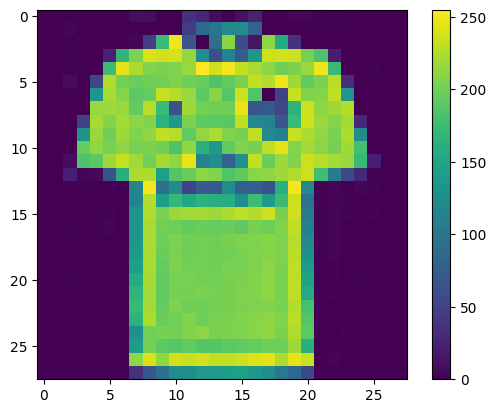

In [117]:
plt.figure()
plt.imshow(val_x[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [118]:
# Нормализуем данные (0-255 -> 0-1.0).
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
val_x = val_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255
val_x = val_x / 255

Чтобы убедиться, что данные имеют правильный формат и возможно построить и обучить сеть, тобразим первые 25 изображений из обучающего набора и отобразим имя класса под каждым изображением.

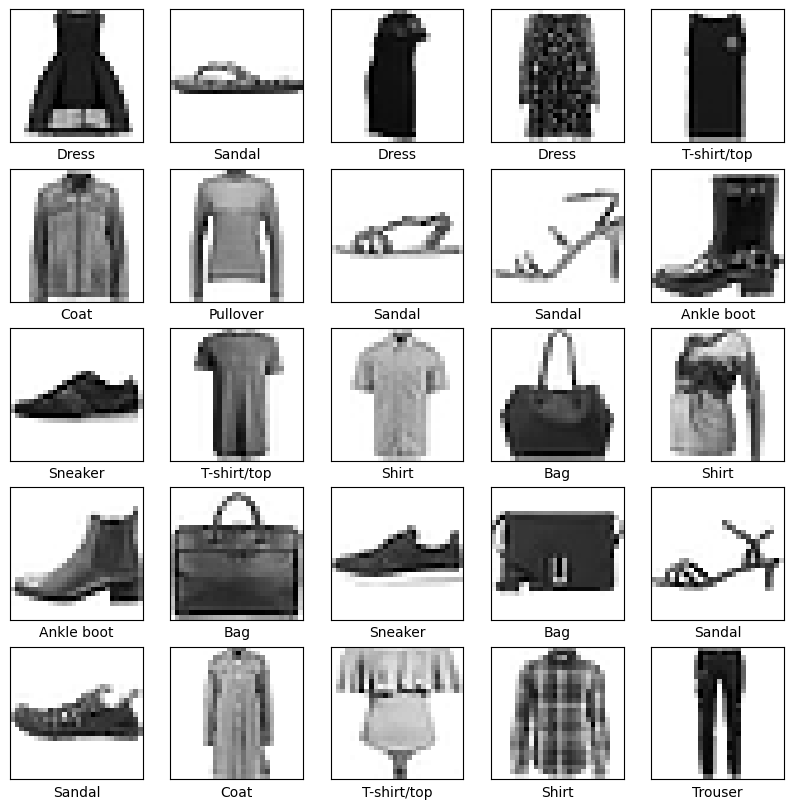

In [119]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

# Создаем и обучаем модель

In [120]:
#создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [121]:
# И обучаем её.
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [122]:
model_history = model.fit(
    train_x,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/50
44/44 [==============================] - 7s 151ms/step - loss: 0.9119 - accuracy: 0.7113 - val_loss: 0.5496 - val_accuracy: 0.7994
Epoch 2/50
44/44 [==============================] - 7s 159ms/step - loss: 0.5213 - accuracy: 0.8145 - val_loss: 0.4980 - val_accuracy: 0.8284
Epoch 3/50
44/44 [==============================] - 7s 162ms/step - loss: 0.4536 - accuracy: 0.8359 - val_loss: 0.4384 - val_accuracy: 0.8431
Epoch 4/50
44/44 [==============================] - 6s 144ms/step - loss: 0.4142 - accuracy: 0.8516 - val_loss: 0.4071 - val_accuracy: 0.8555
Epoch 5/50
44/44 [==============================] - 7s 164ms/step - loss: 0.3946 - accuracy: 0.8570 - val_loss: 0.3867 - val_accuracy: 0.8636
Epoch 6/50
44/44 [==============================] - 7s 162ms/step - loss: 0.3735 - accuracy: 0.8678 - val_loss: 0.3733 - val_accuracy: 0.8636
Epoch 7/50
44/44 [==============================] - 7s 165ms/step - loss: 0.3627 - accuracy: 0.8713 - val_loss: 0.3921 - val_accuracy: 0.8574
Epoch 

Оцениваем точность модели

In [123]:
test_loss, test_acc = model.evaluate(test_x,  target_test, verbose=2)

print('\nTest accuracy:', test_acc)

107/107 - 1s - loss: 0.4895 - accuracy: 0.8847 - 988ms/epoch - 9ms/step

Test accuracy: 0.8846830725669861


# Делаем предсказание

In [124]:
prediction = model.predict(val_x)
prediction.shape

313/313 [==============================] - 3s 10ms/step


(10000, 10)

In [125]:
category=[]
for i in prediction:
    category.append(np.argmax(i))

Визуализируем модель

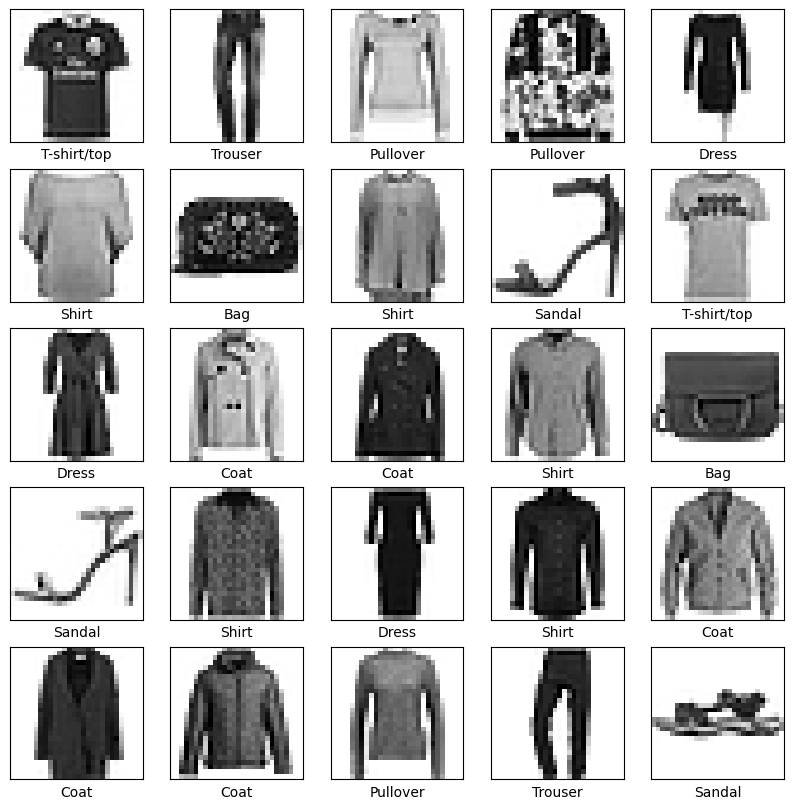

In [126]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[category[i]])
plt.show()

# Загружаем модель

In [127]:
submission = {
    'Id': list(test.Id.values),
    'Category': category
}
solution = pd.DataFrame(submission)
solution.to_csv('submission_my.csv',index=False)

In [128]:
!kaggle competitions submit -c mds-ufu-dl-test -f submission_my.csv -m "Message" 

100% 67.3k/67.3k [00:00<00:00, 118kB/s]
Successfully submitted to [MDS-UFU-DL-TEST] Построение классификатора